<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

%matplotlib inline

### 1. Load Data

From UCI's Machine Learning Repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/


Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
breast_cancer_csv = '/Users/ayano/Desktop/Data Science & AI/csv/breast-cancer-wisconsin-data.csv'

In [5]:
breast_cancer = pd.read_csv( breast_cancer_csv)

In [6]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
breast_cancer.shape

(569, 33)

In [8]:
breast_cancer.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### 2. EDA

Explore dataset. Check for nulls. Make the target column binary.

In [9]:
null_counts = breast_cancer.isnull().sum()
print(null_counts)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map({'M': 1, 'B': 0})
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
breast_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [23]:
breast_cancer[[#'id',
    'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', #'Unnamed: 32']

SyntaxError: incomplete input (737439993.py, line 10)

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [25]:
X = breast_cancer[[ 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y = breast_cancer['diagnosis']

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [27]:
lr= LogisticRegression()

lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

/Users/ayano/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# 訓練データの確認
print('X_train：',X_train.shape)
print('y_train：',y_train.shape)

X_train： (398, 31)
y_train： (398,)


In [29]:
# テストデータの確認
print('X_test：',X_test.shape)
print('y_test：',y_test.shape)

X_test： (171, 31)
y_test： (171,)


In [30]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [31]:
y_test

512    1
457    0
439    0
298    0
37     0
      ..
7      1
408    1
523    0
361    0
553    0
Name: diagnosis, Length: 171, dtype: int64

In [32]:
lr.predict_proba(X_test)

array([[2.34660351e-03, 9.97653396e-01],
       [9.76597953e-01, 2.34020470e-02],
       [9.99636917e-01, 3.63082873e-04],
       [9.42755380e-01, 5.72446195e-02],
       [9.99941453e-01, 5.85465402e-05],
       [9.98967126e-01, 1.03287368e-03],
       [9.98881697e-01, 1.11830296e-03],
       [9.98909255e-01, 1.09074498e-03],
       [9.43505609e-01, 5.64943914e-02],
       [9.99813701e-01, 1.86299386e-04],
       [9.52771725e-01, 4.72282749e-02],
       [9.44451480e-01, 5.55485196e-02],
       [9.97998580e-01, 2.00141986e-03],
       [3.57918714e-01, 6.42081286e-01],
       [9.81415352e-01, 1.85846483e-02],
       [4.89167635e-03, 9.95108324e-01],
       [9.95962822e-01, 4.03717846e-03],
       [2.03077111e-10, 1.00000000e+00],
       [3.86062039e-04, 9.99613938e-01],
       [4.02788913e-13, 1.00000000e+00],
       [7.32335264e-06, 9.99992677e-01],
       [1.08831089e-01, 8.91168911e-01],
       [9.99795499e-01, 2.04500579e-04],
       [9.95475829e-01, 4.52417123e-03],
       [1.001982

<Axes: xlabel='Predicted', ylabel='Actual'>

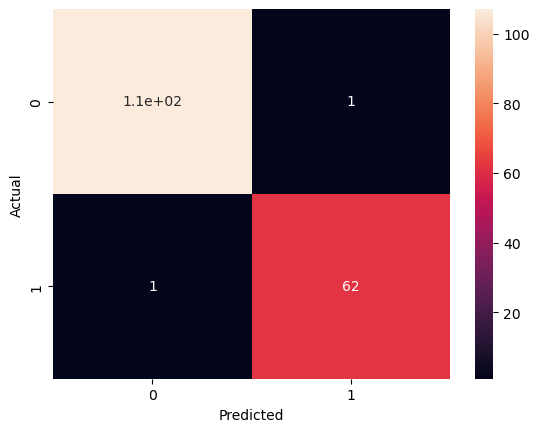

In [33]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)

#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [39]:
# predict test class:
# テストセットに対する予測ラベル
y_pred_labels = lr.predict(X_test)

# predicted test probability:
# テストセットに対する予測確率
y_pred_probabilities = lr.predict_proba(X_test)


# 予測ラベルの表示
print("予測ラベル:", y_pred_labels)

# 予測確率の表示 (各クラスごとの確率)
print("予測確率:\n", y_pred_probabilities)


予測ラベル: [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]
予測確率:
 [[2.34660351e-03 9.97653396e-01]
 [9.76597953e-01 2.34020470e-02]
 [9.99636917e-01 3.63082873e-04]
 [9.42755380e-01 5.72446195e-02]
 [9.99941453e-01 5.85465402e-05]
 [9.98967126e-01 1.03287368e-03]
 [9.98881697e-01 1.11830296e-03]
 [9.98909255e-01 1.09074498e-03]
 [9.43505609e-01 5.64943914e-02]
 [9.99813701e-01 1.86299386e-04]
 [9.52771725e-01 4.72282749e-02]
 [9.44451480e-01 5.55485196e-02]
 [9.97998580e-01 2.00141986e-03]
 [3.57918714e-01 6.42081286e-01]
 [9.81415352e-01 1.85846483e-02]
 [4.89167635e-03 9.95108324e-01]
 [9.95962822e-01 4.03717846e-03]
 [2.03077111e-10 1.00000000e+00]
 [3.86062039e-04 9.99613938e-01]
 [4.0278891

#### 3.3 Create the confusion matrix for your classfier's performance on the test set.

Convert confusion_matrix to a dataframe.

    columns=['predicted_healthy', 'predicted_cancer']
    index=['is_healthy', 'is_cancer']

In [41]:
# ANSWER

import pandas as pd
from sklearn.metrics import confusion_matrix

# 混同行列の作成
confusion_data = confusion_matrix(y_test, y_pred_labels)

# 混同行列をデータフレームに変換
confusion_df = pd.DataFrame(confusion_data, columns=['predicted_healthy', 'predicted_cancer'], index=['is_healthy', 'is_cancer'])

# データフレームの表示
print(confusion_df)

            predicted_healthy  predicted_cancer
is_healthy                107                 1
is_cancer                   1                62


#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?

    (TP + TN) / float(TP + TN + FP + FN)

In [44]:
# ANSWER
# use float to perform true division, not integer division

# TP: True Positive (真陽性)
# TN: True Negative (真陰性)
# FP: False Positive (偽陽性)
# FN: False Negative (偽陰性)

TP = 62
TN = 107
FP = 1
FN = 1

accuracy = (TP + TN) / float(TP + TN + FP + FN)
accuracy

0.9883040935672515

#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [47]:
# ANSWER

TP = 62
TN = 107
FP = 1
FN = 1

MisclassificationRate = (FP + FN) / float(TP + TN + FP + FN)
MisclassificationRate

0.011695906432748537

#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN

    sensitivity = TP / float(FN + TP)

In [49]:
# ANSWER

TP = 62
FN = 1

sensitivity = TP / (FN + TP)
sensitivity

0.9841269841269841

#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP

    specificity = TN / (TN + FP)

In [50]:
# ANSWER

TN = 107
FP = 1

specificity = TN / (TN + FP)
specificity

0.9907407407407407

#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [51]:
# ANSWER

TN = 107
FP = 1

false_positive_rate = FP / float(TN + FP)
false_positive_rate

0.009259259259259259

#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [52]:
# ANSWER

TP = 62
FP = 1

precision = TP / float(TP + FP)
precision 

0.9841269841269841

#### 3.10 Create a predicted test probability dataframe with column names 'class_0_pp','class_1_pp'

In [56]:
# ANSWER
# Get the predicted probability vector and explicitly name the columns:)

# ロジスティック回帰モデルのインスタンス化
model = LogisticRegression()

# モデルの訓練
model.fit(X_train, y_train)

# 1. モデルを使用してテストデータの確率を予測
y_pred_prob = model.predict_proba(X_test)

# 2. 予測された確率ベクトルを取得
class_0_pp = y_pred_prob[:, 0]  # クラス0の確率
class_1_pp = y_pred_prob[:, 1]  # クラス1の確率

# 3. データフレームに変換し、列の名前を指定
predicted_probabilities_df = pd.DataFrame({'class_0_pp': class_0_pp, 'class_1_pp': class_1_pp})



/Users/ayano/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [57]:
from sklearn.metrics import roc_curve, auc

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


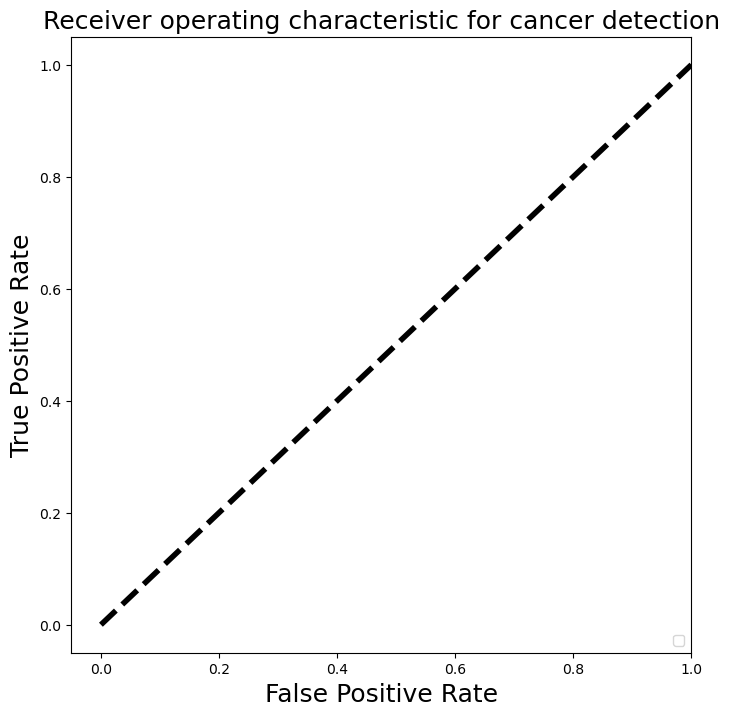

In [58]:
# For class 1, find the area under the curve
# Find fpr, tpr

# Find auc

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



